# A-gs model and implementation (simulation CO2 and H2O flux)

## Initialize data and model

### Setup and fetch data

In [1]:
# Settings
Username   = 'Beheerder'
years      = range(2017,2021)    #(1997,2021) # Set years to download

In [2]:
import os
datapath   = os.path.join('../')
print('datapath is set to %s'%datapath)

# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install plotly 
# !pip install cufflinks
#!pip install colorspacious
#!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.express as px
#import cufflinks as cf
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
from matplotlib import cm
#from colorspacious import cspace_converter
import scipy.stats as stats
#cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)

from datetime import datetime, timedelta
import sys
sys.path.insert(0, os.path.join(datapath,'PythonScripts'))
from Loobos_Toolbox import dateparse, dateparse_Gapfilled, Read_LoobosEddFinal, Read_LooStor, Read_LoodatGapfill, Read_Loobos_halfhourly, Read_Loobos_meteo, Read_Loobos_soil, Read_Loobos_profile

from Ags_model import runAgs

datapath is set to ../


In [3]:
#these next two lines are to prevent re-loading the data. If you want to re-load data, instead comment them out
if not 'progress' in globals(): progress = list()
if not 'dataloaded' in progress:
  # Read files
    df_EC           = Read_LoobosEddFinal    (years,datapath)
    df_Stor         = Read_LooStor           (years,datapath)
    df_Comb         = Read_LoodatGapfill     (years,datapath)
    df_NEE          = Read_Loobos_halfhourly (years,datapath)
    df_meteo        = Read_Loobos_meteo      (years,datapath)
    df_soil         = Read_Loobos_soil       (years,datapath) 
    df_profile      = Read_Loobos_profile    (years,datapath)
    progress.append('dataloaded')

Loading 2017
Loading 2018
Loading 2019
Loading 2020
df_EC loaded. Columns in this dataframe:
Index(['Doy', 'Dtime', 'Flx_Tsonic', 'Flx_Lo-H2O', 'Flx_Lo-CO2', 'Qf_Tsonic',
       'Qf_Lo-H2O', 'Qf_Lo-CO2', 'Mea_Windsp', 'Mea_Tsonic', 'Mea_Lo-H2O',
       'Mea_Lo-CO2', 'U-star', 'Z-over-L', 'Wind-Dir', '80PercFlux'],
      dtype='object')
Loading 2017
Loading 2018


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2019
Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_Stor loaded. Columns in this dataframe:
Index(['Day', 'Time', 'TotalT', 'TotalTflux', 'TotalH2O', 'TotalH2Oflux',
       'TotalCO2', 'TotalCO2flux', 'CO2-2.5m', 'CO2flux-2.5m'],
      dtype='object')
Loading 2017
Loading 2018
Loading 2019
Loading 2020
df_Comb loaded. Columns in this dataframe:
Index(['Year', 'DoY', 'Hour', 'qcNEE', 'NEE', 'LE', 'H', 'Rg', 'Tair', 'Tsoil',
       'rH', 'Ustar', 'VPD', 'NEE_orig', 'NEE_f', 'NEE_fqc', 'NEE_fall',
       'NEE_fall_qc', 'NEE_fnum', 'NEE_fsd', 'NEE_fmeth', 'NEE_fwin',
       'Rg_orig', 'Rg_f', 'Rg_fqc', 'Rg_fall', 'Rg_fall_qc', 'Rg_fnum',
       'Rg_fsd', 'Rg_fmeth', 'Rg_fwin', 'H_orig', 'H_f', 'H_fqc', 'H_fall',
       'H_fall_qc', 'H_fnum', 'H_fsd', 'H_fmeth', 'H_fwin', 'LE_orig', 'LE_f',
       'LE_fqc', 'LE_fall', 'LE_fall_qc', 'LE_fnum', 'LE_fsd', 'LE_fmeth',
       'LE_fwin', 'Tair_orig', 'Tair_f', 'Tair_fqc', 'Tair_fall',
       'Tair_fall_qc', 'Tair_fnum', 'Tair_fsd', 'Tair_fmeth', 'Tair_fwin',
       'PotRad', 'FP_NEEnight', 'FP_

C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2018
Loading 2019


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Done
df_NEE loaded. Columns in this dataframe:
Index(['NEE_f', 'H_f', 'LE_f', 'Reco_f', 'GPP_f', 'NEE_fqc', 'H_fqc', 'LEfqc',
       'Reco', 'Tair', 'Rg_f', 'VPD', 'Tsoil', 'rH', 'Ustar', 'R-ref', 'E_0'],
      dtype='object')
Loading 2017


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2018


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2019
Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_meteo loaded. Columns in this dataframe:
Index(['Daynumber', 'Time', 'S(i)', 'S(o)', 'L(i)', 'L(o)', 'L(i)corr',
       'L(o)corr', 'R(net)', 'PARrefl', 'PAR', 'PARdiff', 'G1', '-q',
       'Te(vaisal)', 'Te-L(i)', 'Te-L(o)', '-u(z)', '-u(dir)', 'H2Olic',
       'CO2lic', 'Vbatt', 'CR10temp', 'P(mast)', 'P(guter)', 'P(field)',
       'SD S(i)', 'SD L(i)', 'SD q', 'SD Te(vaisal)', 'SD u(z)', '#NAME?',
       '#NAME?.1', '#NAME?.2'],
      dtype='object')
Loading ../\Soilmoist\Final\Loosoifinal17.csv...
Loading ../\Soilmoist\Final\Loosoifinal18.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ../\Soilmoist\Final\Loosoifinal19.csv...
Loading ../\Soilmoist\Final\Loosoifinal20.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_soil loaded. Columns in this dataframe:
Index(['Daynumber', 'Time', 'SM-Lit', 'SM-003', 'SM-020', 'SM-050', 'SM-100',
       'ST-Lit', 'ST-003', 'ST-020', 'ST-050', 'ST-100', 'T-bole', 'Temp200',
       'Temp201', 'Temp202', 'Temp203', 'Temp204', 'Temp205', 'Temp206',
       'Temp207'],
      dtype='object')
Loading 2017


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2018
Loading 2019


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_profile loaded. Columns in this dataframe:
Index(['Daynumber', 'Time', 'VaiVPtop', 'VaiVPmid', 'Vtemptop', 'Vtempmid',
       'VecWStop', 'VecWSmid', 'Pressure', 'H2Olevel1', 'H2Olevel2',
       'H2Olevel3', 'H2Olevel4', 'H2Olevel5', 'CO2level1', 'CO2level2',
       'CO2level3', 'CO2level4', 'CO2level5', 'H2Ocal', 'CO2cal'],
      dtype='object')


In [4]:
# Make filter for GPP orginial data and not gabfilled
I = ((df_Comb['GPP_fqc']==0)&(df_meteo['PAR']>0))

# Filter for CO2 data
t = df_profile.index                                          
time = (t < np.datetime64('2013-05-08')) | (t > np.datetime64('2013-06-01'))
CO2 = (df_profile['CO2level1'] > 300)

#General filter
I = ((df_Comb['GPP_fqc']==0)&(df_meteo['PAR']>0))

df_meteo_CO2 = df_meteo[time][CO2]
df_meteo_filter = df_meteo_CO2[I]
# print(df_meteo_CO2_filter['PAR'])

df_Comb_CO2 = df_Comb[time][CO2]
df_Comb_filter = df_Comb_CO2[I]
# print(df_Comb_CO2_filter['GPP_f'])

df_profile_CO2 = df_profile[time][CO2]
df_profile_filter = df_profile_CO2[I]
# print(df_profile_CO2_filter['CO2level1'])

df_EC_CO2 = df_EC[time][CO2]
df_EC_filter = df_EC_CO2[I]

C:\Users\feder\AppData\Local\Temp\ipykernel_13980\3660046963.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_meteo_filter = df_meteo_CO2[I]
C:\Users\feder\AppData\Local\Temp\ipykernel_13980\3660046963.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Comb_filter = df_Comb_CO2[I]
C:\Users\feder\AppData\Local\Temp\ipykernel_13980\3660046963.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_profile_filter = df_profile_CO2[I]
C:\Users\feder\AppData\Local\Temp\ipykernel_13980\3660046963.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_EC_filter = df_EC_CO2[I]


### Run A-gs model

## Calcuate ET

### Assemble dataframe 'df_ET' that will hold output and fill with inputs

In [7]:
df_ET = pd.concat([df_meteo['L(o)'],df_meteo['Te-L(o)'],df_profile['Pressure'],df_Comb['VPD'],df_Comb['rH'],df_meteo['P(mast)']],axis=1,sort=False)
#convert Pressure from hPa to kPa 
df_ET['p_kPa']=df_ET['Pressure']/10
df_ET['VPD_adj']=df_ET['VPD'].loc[df_ET['VPD']>0] #some outlier values for VPD are negative, remove from dataset
df_ET['VPD_adj']=df_ET['VPD_adj']/10  # VPD from df_Comb is in hPa, I need kPa, so hPa/10 = kPa

### step 1) leaf temperature 'T_sfc'

<Axes: title={'center': "Leaf surface temp 'T_sfc_C' in Celcius"}>

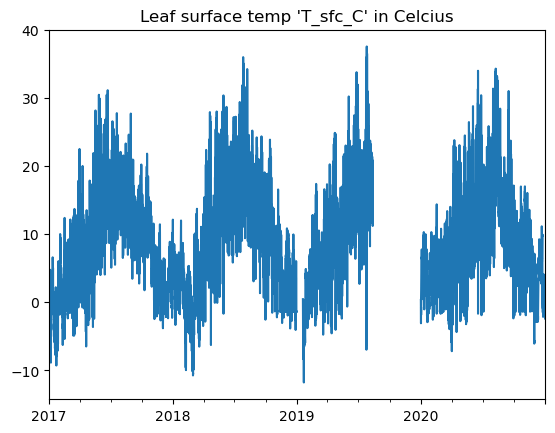

In [8]:
#correcting outgoing Longwave: the sensor measures values between -20 and 10, but that it because the blackbody emission from the sensor itself (dependent on the temp of the sensor) is not taken into account.
#thus we must take the output of the sensor and add the emitted longwave radiation of the sensor itself.
#R_L(out)_corrected = R_L(out)_measured + R_L(out)_sensor, where R_L(out)_sensor = sigma*T(sensor)^4

#constants:
sigma = 5.67e-8 # W/m2/K4, Stefan-boltzmann constant
epsilon = 1/0.98
df_ET['L(o)_sensor'] = sigma*((df_ET['Te-L(o)']+273)**4)    #where Te-L(o) is in C
df_ET['L(o)_corr'] = df_ET['L(o)'] + df_ET['L(o)_sensor'] # where L(o)_corr is corrected Longwave out (corrected for sensor's own temp)
#df_ET['L(o)_corr'].plot() # varies from 300 to 500 Wm-2

#Formula for leaf temp is: R_L(out)_corrected = epsilon * sigma * T_sfc^4 (where epsilon = 0.98-1.00, sigma = 5.67e-8 W/m2/K4, T_sfc in K)
#rearrange formula to:
df_ET['T_sfc'] = (df_ET['L(o)_corr'] / (epsilon*sigma)) ** (1/4)  # T_sfc output in K)
df_ET['T_sfc_C'] = df_ET['T_sfc']-273
#check output:
df_ET['T_sfc_C'].plot(title="Leaf surface temp 'T_sfc_C' in Celcius")

### step 2) saturated vapor pressure 'e_sat'

#### calculating e_sat assuming T_sfc is in Kelvin

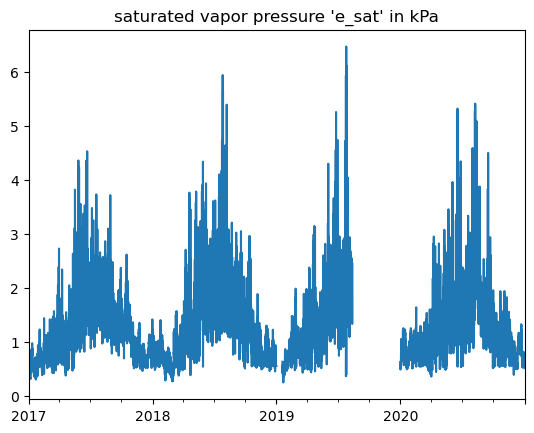

In [9]:
#calculating e_sat from T_sfc_C, note that T_sfc_C ranges from -150 C to -250 C (suspicious)
#constants:
e_sat_0 = 0.6107 # e_sat_0 = 0.6107 kPa or 610.7 Pa
a = 7.5
b = 237.3 # oC (geen typo)
df_ET['e_sat'] = e_sat_0 * 10**(a*df_ET['T_sfc_C'] / (b+df_ET['T_sfc_C'])) #  T_sfc_C in oC

#formal clausius-Clapeyron (aka August-Roche-Magnus) from wikipedia: e_sat = e_sat_0 * 10^( 17.6*Temp / 243+ Temp)  where e_sat is in hPa and Temp is in K

p1=df_ET['e_sat'].plot(title="saturated vapor pressure 'e_sat' in kPa")
#p1.axhline(y=100,c='r')
#p1.axhline(y=0.40,c='r')

#### wikipedia formula

In [14]:
#USING WIKIPEDIA FORMULA INSTEAD OF ONE GIVEN BY MICHIEL
#calculating e_sat from T_sfc, note that T_sfc ranges from 0 K to (suspicious)
#constants:
#e_sat_0 = 0.6107 # e_sat_0 = 0.6107 kPa or 610.7 Pa
#a = 17.6
#b = 243 # oC (geen typo)
#df_ET['e_sat_wiki'] = e_sat_0 * 10**(a*df_ET['T_sfc'] / (b+df_ET['T_sfc'])) #  T_sfc in K

#formal clausius-Clapeyron (aka August-Roche-Magnus) from wikipedia: e_sat = e_sat_0 * 10^( 17.6*Temp / 243+ Temp)  where e_sat is in hPa and Temp is in K

#p1=df_ET['e_sat_wiki'].plot(title="saturated vapor pressure 'e_sat' in hPa (using Wikipedia formula) ")
#p1.axhline(y=100,c='r')
#p1.axhline(y=0.40,c='r')

### step 3) ET from VPD and Esat

<Axes: title={'center': 'VPD (caldulated from RH) in kg(vapor)/kg(air)'}>

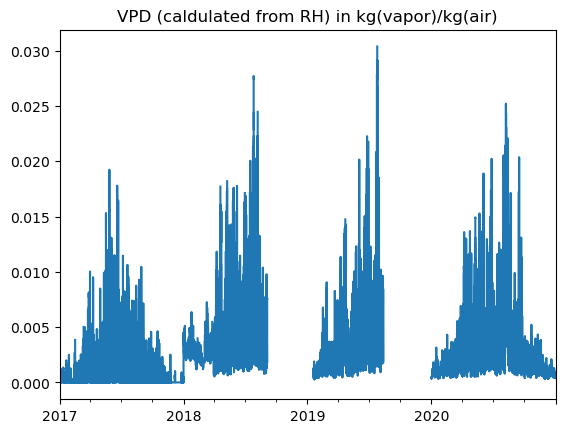

In [10]:
#VPD(in Pa) = e_sat - e_act
#VPD(in kg/kg) = q_sat - q_act

Rd = 287 # J/kg K
Rv = 462 # J/kg K
# e = vapour pressure # in Pa of kPa
# p = air pressure # in Pa of kPa

#Je kunt specific humidity q in kg/kg berekenen uit vapour pressure e via:
#q = Rd/Rv * e/p

#q_sat = Rd/Rv * e_sat/p
df_ET['q_sat'] = Rd/Rv * df_ET['e_sat']/df_ET['p_kPa']

#method 1 of calculating e_act: through VPD from dataset
#note: this is giving negative values so I'm removing it for now.
#VPD = e_sat - e_act -> e_act = e_sat - VPD
df_ET['e_act_fromVPD'] = df_ET['e_sat'] - df_ET['VPD_adj']

#q_act = Rd/Rv * e_act/p
df_ET['q_act_fromVPD'] = Rd/Rv * df_ET['e_act_fromVPD']/df_ET['p_kPa'] #adding this to check

#final step, subtract to get VPD for specific humidity
#VPD_q = q_sat-q_act
df_ET['VPDq_fromVPD']=df_ET['q_sat'] - df_ET['q_act_fromVPD'] #adding this to check if there's a substantial difference

#method 2 of calculating e_act: through Rel Humidity from dataset
# RH = e_act/e_sat *100 -> e_act = RH * e_sat /100
df_ET['e_act_fromRH'] = (df_ET['rH']/100)*df_ET['e_sat']

#q_act = Rd/Rv * e_act/p
df_ET['q_act_fromRH'] = Rd/Rv * df_ET['e_act_fromRH']/df_ET['p_kPa']

#final step, subtract to get VPD for specific humidity
#VPD_q = q_sat-q_act
df_ET['VPDq_fromRH']=df_ET['q_sat'] - df_ET['q_act_fromRH']

#df_ET['VPDq_fromVPD'].plot(title='VPD (calculated from VPD) in kg(vapor)/kg(air)')
df_ET['VPDq_fromRH'].plot(title='VPD (caldulated from RH) in kg(vapor)/kg(air)')

In [ ]:
#plot the differences between the methods
#df_ET['e_act_diff']=df_ET['e_act_fromVPD']-df_ET['e_act_fromRH']
#df_ET['e_act_diff'].plot()
#df_ET['e_sat'].plot()

### step 4) ET in Wm-2 from VPD

In [11]:
#final step
#ET = rho * Lv * VPD/rs
#rho = 1.2 (approx value given by Michiel), Lv = 2260 kJ/kg (from google) Note: update to more accurate values when I can

df_ET['ET'] = 1.2 * 2260000 * (df_ET['VPDq_fromRH']/rs)
df_ET['ET_VPD'] = 1.2 * 2260000 * (df_ET['VPDq_fromVPD']/rs)
df_ET['ET_VPD2'] = 1.2 * 2260000 * (df_ET['VPDq_fromVPD']/(rs+ra))

## End of Calculating ET section

## Visualize results

### yearly overviews of CO2 and H2O fluxes

#### Water (ET and LE) yearly overview

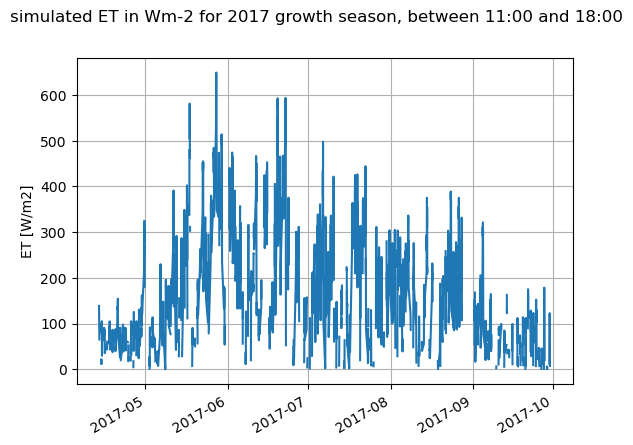

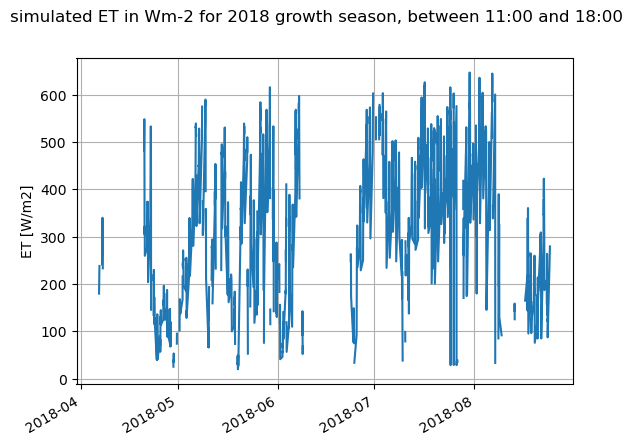

In [13]:
#simulated ET
#2017
fig, ax = plt.subplots()
ET_plotting_2017 = df_ET['ET_VPD2'].loc['2017-04-01':'2017-09-30'].between_time("11:00", "18:00")
ax.plot(ET_plotting_2017)
ax.set_ylabel('ET [W/m2]')
plt.suptitle('simulated ET in Wm-2 for 2017 growth season, between 11:00 and 18:00')
plt.grid()
fig.autofmt_xdate()
plt.show()
#2018
fig, ax = plt.subplots()
ET_plotting_2018 = df_ET['ET_VPD2'].loc['2018-04-01':'2018-09-30'].between_time("11:00", "18:00")
ax.plot(ET_plotting_2018)
ax.set_ylabel('ET [W/m2]')
plt.suptitle('simulated ET in Wm-2 for 2018 growth season, between 11:00 and 18:00')
plt.grid()
fig.autofmt_xdate()
plt.show()

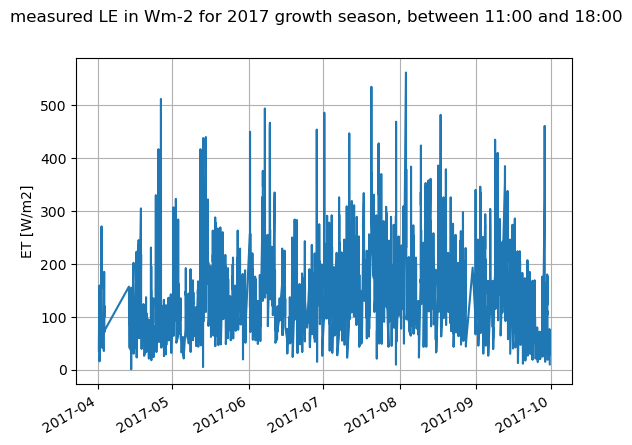

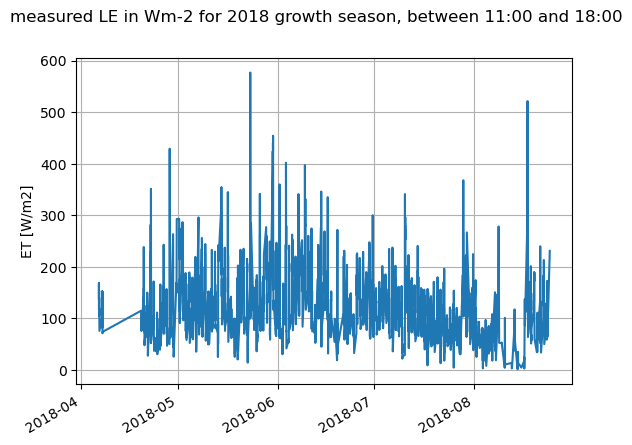

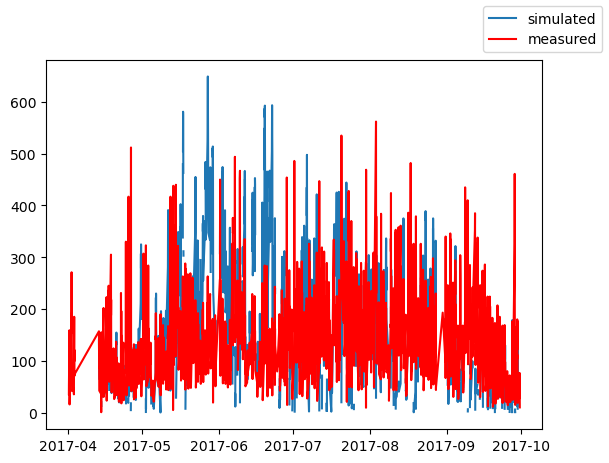

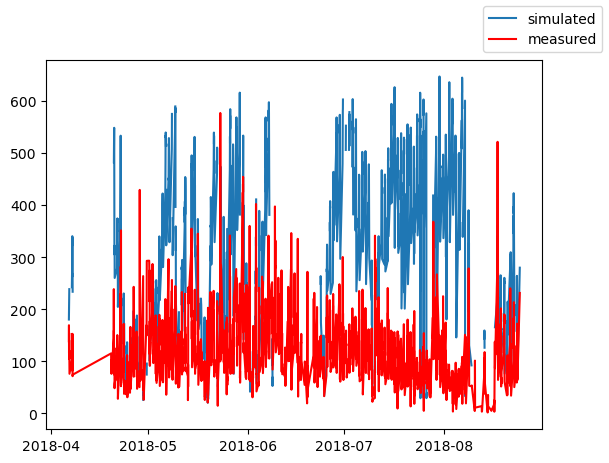

In [14]:
#measured LE
#2017
fig, ax = plt.subplots()
LE_plotting_2017 = df_Comb['LE'].loc[df_Comb['LE']>0].loc['2017-04-01':'2017-09-30'].between_time("11:00", "18:00")
ax.plot(LE_plotting_2017)
ax.set_ylabel('ET [W/m2]')
plt.suptitle('measured LE in Wm-2 for 2017 growth season, between 11:00 and 18:00')
plt.grid()
fig.autofmt_xdate()
plt.show()
#2018
fig, ax = plt.subplots()
LE_plotting_2018 = df_Comb['LE'].loc[df_Comb['LE']>0].loc['2018-04-01':'2018-09-30'].between_time("11:00", "18:00")
ax.plot(LE_plotting_2018)
ax.set_ylabel('ET [W/m2]')
plt.suptitle('measured LE in Wm-2 for 2018 growth season, between 11:00 and 18:00')
plt.grid()
fig.autofmt_xdate()
plt.show()
#difference 2017
fig,ax = plt.subplots()
ax.plot(ET_plotting_2017)
ax.plot(LE_plotting_2017,c='r')
fig.legend(['simulated','measured'])
plt.show()
#difference 2017
fig,ax = plt.subplots()
ax.plot(ET_plotting_2018)
ax.plot(LE_plotting_2018,c='r')
fig.legend(['simulated','measured'])
plt.show()

#### Carbon (An and GPP) yearly overview

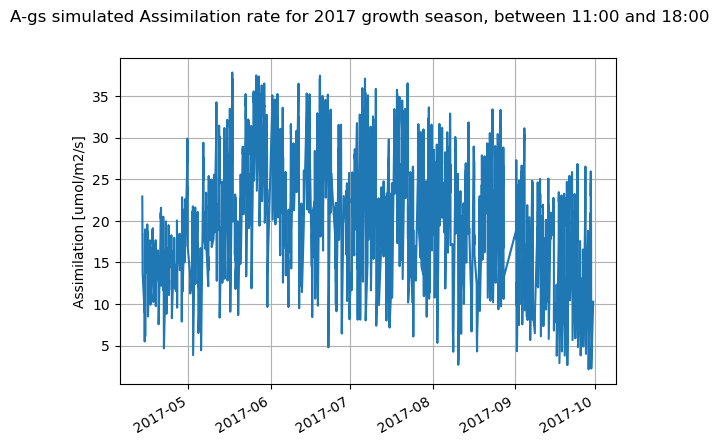

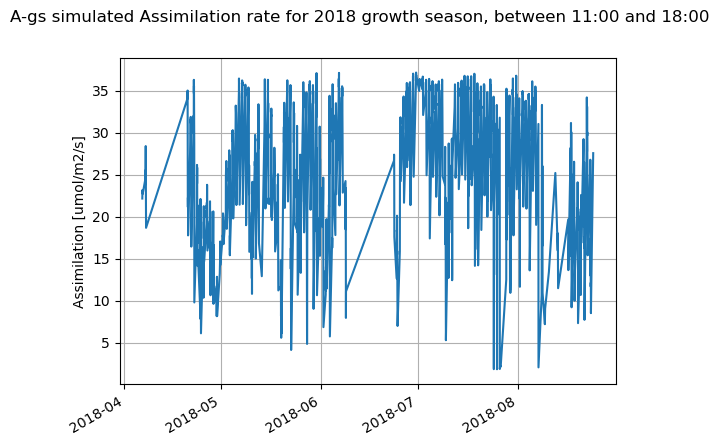

In [15]:
#simulated An
#2017
fig, ax = plt.subplots()
an_plotting_2017 = an_umol.loc[an_umol>0].loc['2017-04-01 00:00':'2017-10-01 00:00'].between_time("11:00", "18:00")
ax.plot(an_plotting_2017)
ax.set_ylabel('Assimilation [umol/m2/s]')
plt.suptitle('A-gs simulated Assimilation rate for 2017 growth season, between 11:00 and 18:00')
plt.grid()
fig.autofmt_xdate()
plt.show()
#2018
fig, ax = plt.subplots()
an_plotting_2018 = an_umol.loc[an_umol>0].loc['2018-04-01 00:00':'2018-10-01 00:00'].between_time("11:00", "18:00")
ax.plot(an_plotting_2018)
ax.set_ylabel('Assimilation [umol/m2/s]')
plt.suptitle('A-gs simulated Assimilation rate for 2018 growth season, between 11:00 and 18:00')
plt.grid()
fig.autofmt_xdate()
plt.show()

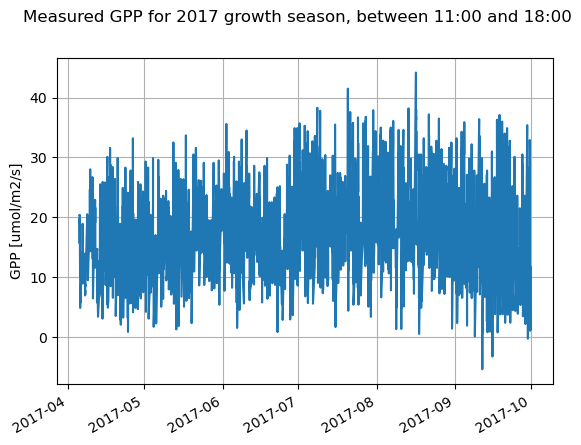

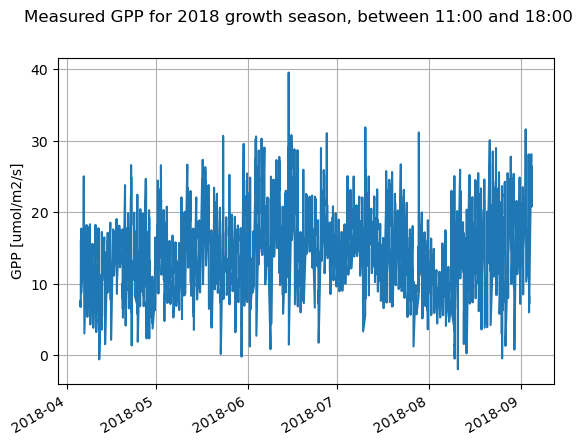

In [16]:
#measured GPP
#2017
fig, ax = plt.subplots()
GPP_plotting_2017 = df_Comb['GPP_f'].loc['2017-04-05 00:00':'2017-10-01 00:00'].between_time("11:00", "18:00")
ax.plot(GPP_plotting_2017)
ax.set_ylabel('GPP [umol/m2/s]')
plt.suptitle('Measured GPP for 2017 growth season, between 11:00 and 18:00')
plt.grid()
fig.autofmt_xdate()
plt.show()
#2018
fig, ax = plt.subplots()
GPP_plotting_2018 = df_Comb['GPP_f'].loc['2018-04-05 00:00':'2018-10-01 00:00'].between_time("11:00", "18:00")
ax.plot(GPP_plotting_2018)
ax.set_ylabel('GPP [umol/m2/s]')
plt.suptitle('Measured GPP for 2018 growth season, between 11:00 and 18:00')
plt.grid()
fig.autofmt_xdate()
plt.show()

### Day-scale comparison measured and simulated GPP

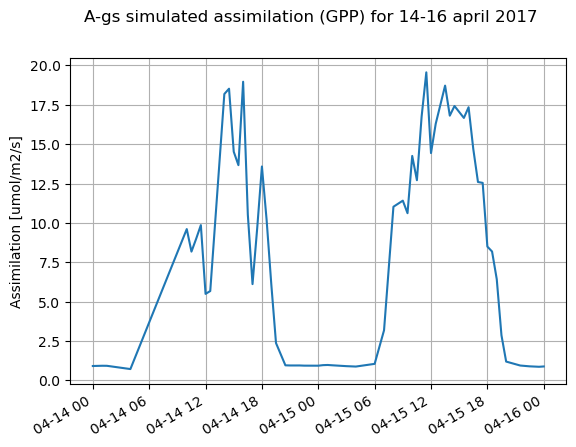

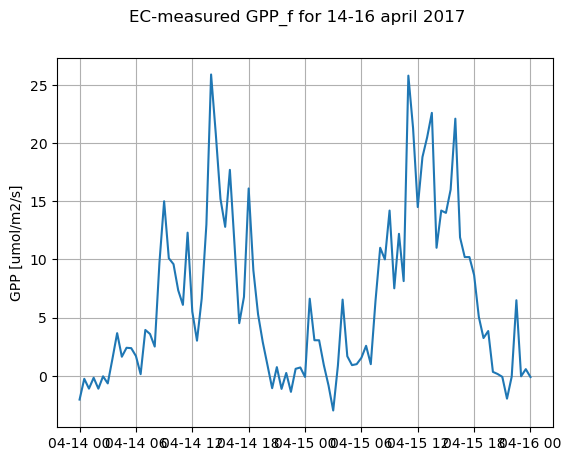

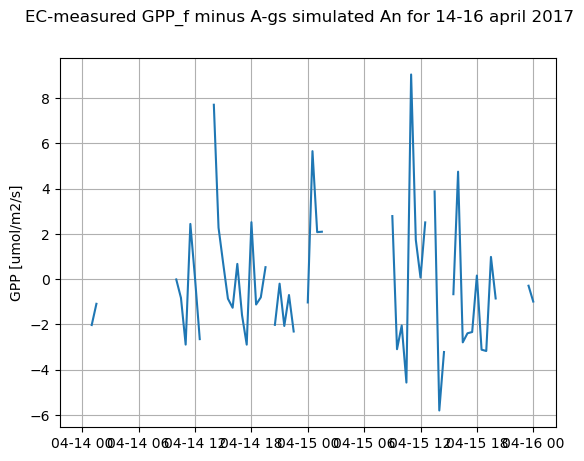

In [17]:
#for the CO2 flux, presumably in mol/area/time, we take it from .....
#this can be split up in a respiration and assimilation flux. For assimilation we take it using night time representative values over time
#An_final is in mg/m2/s, therefor use an_umol
#2017
fig, ax = plt.subplots()
an_plotting_apr2017 = an_umol.loc[an_umol>0].loc['2017-04-14 00:00':'2017-04-16 00:00']#.between_time("11:00", "18:00")
ax.plot(an_plotting_apr2017)
ax.set_ylabel('Assimilation [umol/m2/s]')
fig.autofmt_xdate()
fig.suptitle('A-gs simulated assimilation (GPP) for 14-16 april 2017')
plt.grid()
plt.show()

fig, ax = plt.subplots()
gpp_plotting_apr2017=df_Comb['GPP_f'].loc['2017-04-14 00:00':'2017-04-16 00:00']
ax.plot(gpp_plotting_apr2017)
ax.set_ylabel('GPP [umol/m2/s]')
#fig.autofmt_xdate()
fig.suptitle('EC-measured GPP_f for 14-16 april 2017')
plt.grid()
plt.show()

fig, ax = plt.subplots()
ax.plot(gpp_plotting_apr2017-an_plotting_apr2017)
ax.set_ylabel('GPP [umol/m2/s]')
#fig.autofmt_xdate()
fig.suptitle('EC-measured GPP_f minus A-gs simulated An for 14-16 april 2017')
plt.grid()
plt.show()


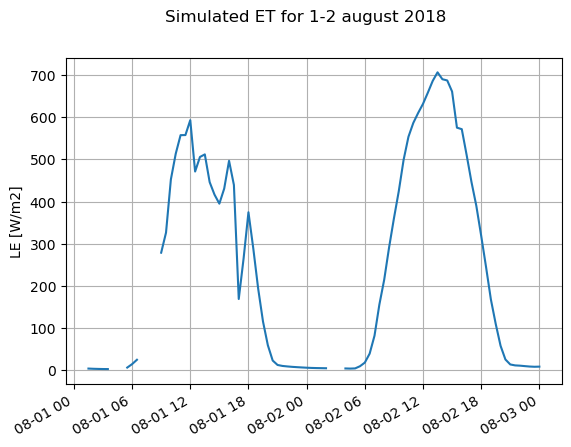

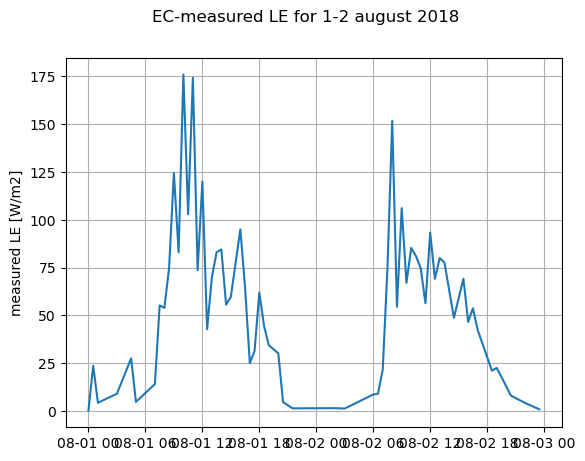

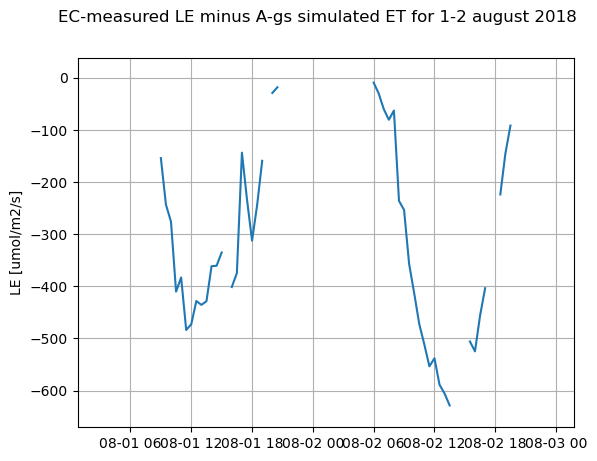

In [18]:
#2017
fig, ax = plt.subplots()
an_plotting_apr2017 = df_ET['ET'].loc['2018-08-01 00:00':'2018-08-03 00:00']
ax.plot(an_plotting_apr2017)
ax.set_ylabel('LE [W/m2]')
fig.autofmt_xdate()
fig.suptitle('Simulated ET for 1-2 august 2018')
plt.grid()
plt.show()

fig, ax = plt.subplots()
gpp_plotting_apr2017=df_Comb['LE'].loc[df_Comb['LE']>0].loc['2018-08-01':'2018-08-02']#.between_time("11:00", "18:00")
ax.plot(gpp_plotting_apr2017)
ax.set_ylabel('measured LE [W/m2]')
#fig.autofmt_xdate()
fig.suptitle('EC-measured LE for 1-2 august 2018')
plt.grid()
plt.show()

fig, ax = plt.subplots()
ax.plot(gpp_plotting_apr2017-an_plotting_apr2017)
ax.set_ylabel('LE [umol/m2/s]')
#fig.autofmt_xdate()
fig.suptitle('EC-measured LE minus A-gs simulated ET for 1-2 august 2018')
plt.grid()
plt.show()

## Troubleshooting ET LE

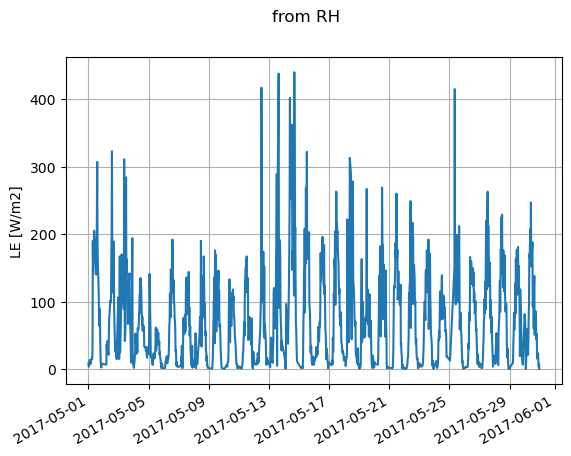

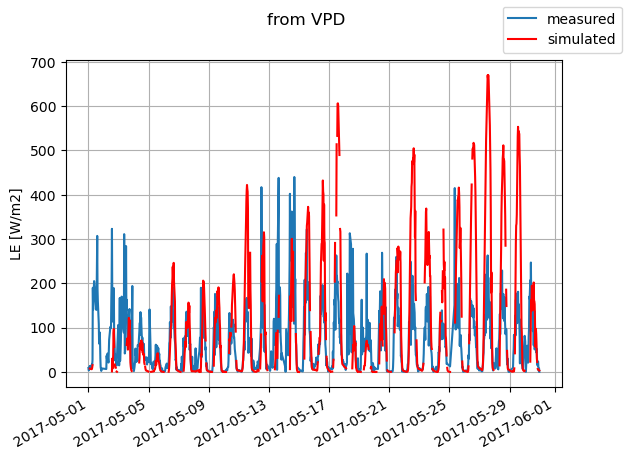

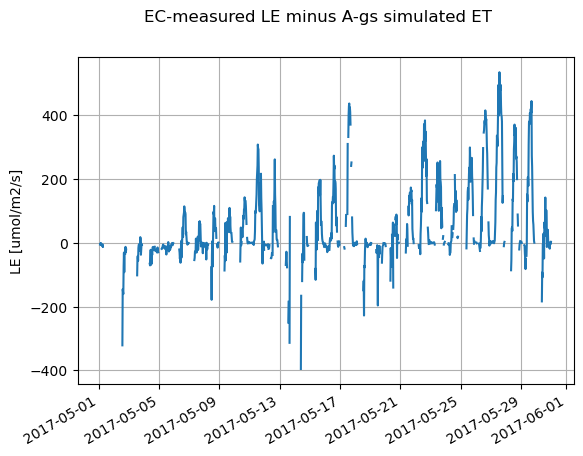

In [19]:
#2017
start,end = '2017-05-01','2017-05-30'

fig, ax = plt.subplots()
simRH_plotting = df_ET['ET'].loc[start:end]
measured_plotting = df_Comb['LE'].loc[df_Comb['LE']>0].loc[start:end]#.between_time("11:00", "18:00")
ax.plot(measured_plotting)
ax.set_ylabel('LE [W/m2]')
fig.autofmt_xdate()
fig.suptitle('from RH')
plt.grid()
plt.show()

fig, ax = plt.subplots()
simVPD_plotting = df_ET['ET_VPD'].loc[start:end]
measured_plotting=df_Comb['LE'].loc[df_Comb['LE']>0].loc[start:end]#.between_time("11:00", "18:00")
ax.plot(measured_plotting)
ax.plot(simVPD_plotting,c='red') #for troubleshoot
ax.set_ylabel('LE [W/m2]')
fig.autofmt_xdate()
fig.suptitle('from VPD')
plt.grid()
fig.legend(['measured','simulated'])
plt.show()

fig, ax = plt.subplots()
ax.plot(simVPD_plotting-measured_plotting)
ax.set_ylabel('LE [umol/m2/s]')
fig.autofmt_xdate()
fig.suptitle('EC-measured LE minus A-gs simulated ET')
plt.grid()
plt.show()

<Axes: >

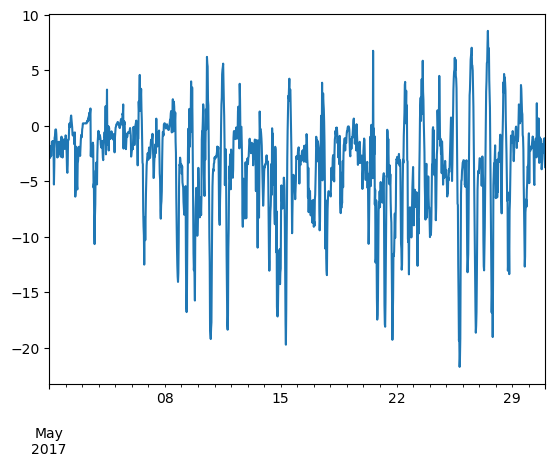

In [19]:
df_ET['L(o)'].loc[start:end].plot()